<a href="https://colab.research.google.com/github/KVSMrudula/KVSMrudula-GlucoSense-Infy-Nov24/blob/main/infosyswork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Using Machine Learning

## Overview
This project focuses on building a machine learning model to predict the likelihood of an individual being diabetic, pre-diabetic, or healthy. By analyzing healthcare statistics and lifestyle factors, the project aims to assist in early detection and intervention, enabling better diabetes management and prevention strategies.

## Project Goals
* Understand the relationship between healthcare and lifestyle statistics and diabetes risk.
* Build a reliable classification model using advanced machine learning techniques.
* Provide actionable insights through feature analysis and evaluation metrics.

## Features
* **Data Preprocessing**: Handling missing values, outliers, class imbalances, and encoding categorical variables.
* **Feature Selection**: Identifying key factors influencing diabetes risk using correlation analysis and feature importance algorithms.
* **Model Development**: Implementing and evaluating various machine learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting, SVM).
* **Evaluation Metrics**: Assessing models using precision, recall, F1-score, accuracy, and AUC for robust validation.
* **Presentation & Reporting**: Summarizing the results, insights, and recommendations in an accessible format.

## Methodology

1) **Data Preparation**:

* Collect and preprocess healthcare and lifestyle data.
* Resolve discrepancies such as missing values, outliers, and imbalances.

2) **Feature Selection & Model Building**:

* Identify significant predictors of diabetes.
* Compare machine learning algorithms to finalize the best-performing model.

3) **Model Evaluation**:

* Validate the model using multiple performance metrics.
* Ensure robustness through cross-validation techniques.

4) **Documentation & Deployment**:

* Prepare detailed documentation and presentations.
* Finalize the project for real-world applications.


## Technologies Used

* **Programming Language**: Python
* **Libraries**: pandas, numpy, matplotlib, seaborn, scikit-learn, XGBoost
* **Tools**: Jupyter Notebook, GitHub

## Expected Outcomes

* A machine learning model that accurately predicts diabetes risk.
* Insights into the impact of lifestyle factors on diabetes.
* A comprehensive framework for healthcare professionals to support early diagnosis and preventative care.

----------------------------------------------------------------------------------------------------------------------------
## Importing Libraries
* **Pandas :** Data manipulation and analysis.
* **Matplotlib :** Basic data visualization.
* **Scikit-learn :** Machine learning and preprocessing.
* **Plotly Express :** Interactive data visualization.

In [348]:
#importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Diabetes= pd.read_csv('diabetesInfosys.csv') # loading the dataset
Diabetes.head(10) # Displays top 10 records of the dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


## Preparing the Dataset
    
* Checking for missing/null values.

* Examining the information in the columns.

* The fundamental statistics of the numeric column.



In [350]:
Diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [351]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [352]:
Diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


## EDA


This Exploratory Data Analysis (EDA) step focuses on preparing data for modeling by addressing:

* **Duplicates** : Eliminate duplicates to maintain data uniqueness.

* **Missing Values** : Identify and impute or remove based on feature relevance.

* **Outliers** : Detect and manage with Z-score or IQR to avoid model bias.

* **Data Consistency** : Standardize data types for reliable model compatibility.

This EDA phase ensures data quality and readiness for accurate modeling.

In [355]:
import pandas as pd

# Load the dataset
data_path = 'diabetesInfosys.csv'
Diabetes = pd.read_csv(data_path)

# Original dataset size
original_size = Diabetes.shape[0]

# Count positives and negatives in original data
original_positive_count = Diabetes[Diabetes['class'] == 'Positive'].shape[0]
original_negative_count = Diabetes[Diabetes['class'] == 'Negative'].shape[0]

# Remove duplicates
Diabetes = Diabetes.drop_duplicates()

# Updated dataset size
after_removal_size = Diabetes.shape[0]

# Count positives and negatives in updated data
updated_positive_count = Diabetes[Diabetes['class'] == 'Positive'].shape[0]
updated_negative_count = Diabetes[Diabetes['class'] == 'Negative'].shape[0]

# Calculate rows deleted
rows_deleted = original_size - after_removal_size

# Print results
print("--- Dataset Overview ---")
print(f"Original dataset size: {original_size}")
print(f"Original positives: {original_positive_count}")
print(f"Original negatives: {original_negative_count}")
print("---------------------------------")
print(f"Rows deleted: {rows_deleted}")
print("---------------------------------")
print(f"Updated dataset size: {after_removal_size}")
print(f"Updated positives: {updated_positive_count}")
print(f"Updated negatives: {updated_negative_count}")


--- Dataset Overview ---
Original dataset size: 520
Original positives: 320
Original negatives: 200
---------------------------------
Rows deleted: 269
---------------------------------
Updated dataset size: 251
Updated positives: 173
Updated negatives: 78


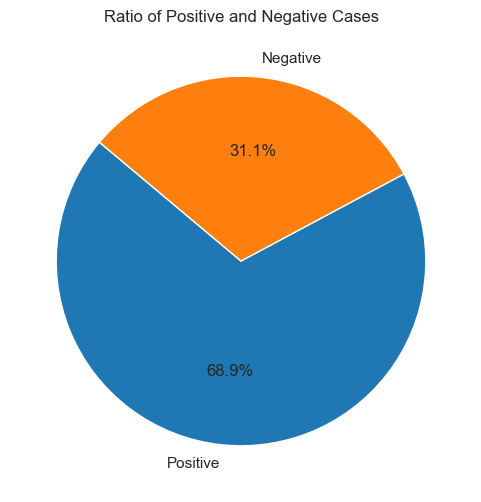

In [356]:
import matplotlib.pyplot as plt

# Count the occurrences of each class (positive/negative)
class_counts = Diabetes['class'].value_counts()

# Custom colors for the pie chart
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Ratio of Positive and Negative Cases")
plt.show()


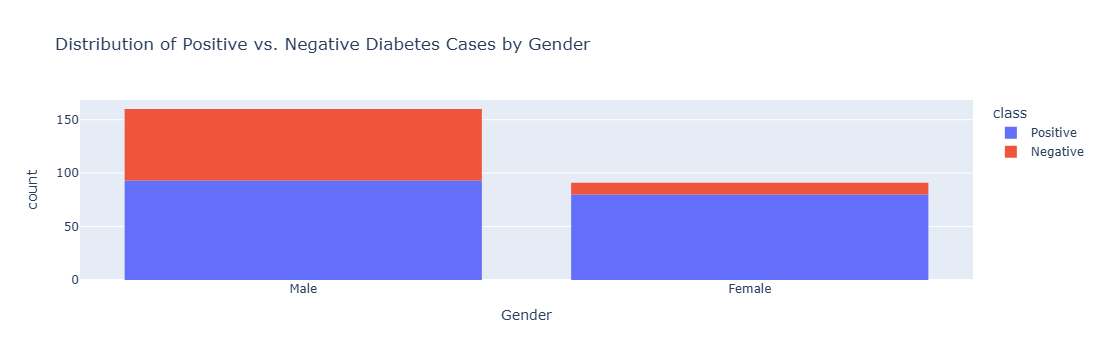

class,Negative,Positive
Gender,,
Female,14.100000,46.240000
Male,85.900000,53.760000


In [357]:

   # For Creating Interactive graphs
gendis= px.histogram(Diabetes, x = 'Gender', color = 'class', title="Distribution of Positive vs. Negative Diabetes Cases by Gender")
gendis.show()
pltbl= ['Gender', 'class']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[pltbl[0]],Diabetes[pltbl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


The data shows that female patients have a higher positivity rate than male patients, suggesting a bias toward female patients with higher positivity. 

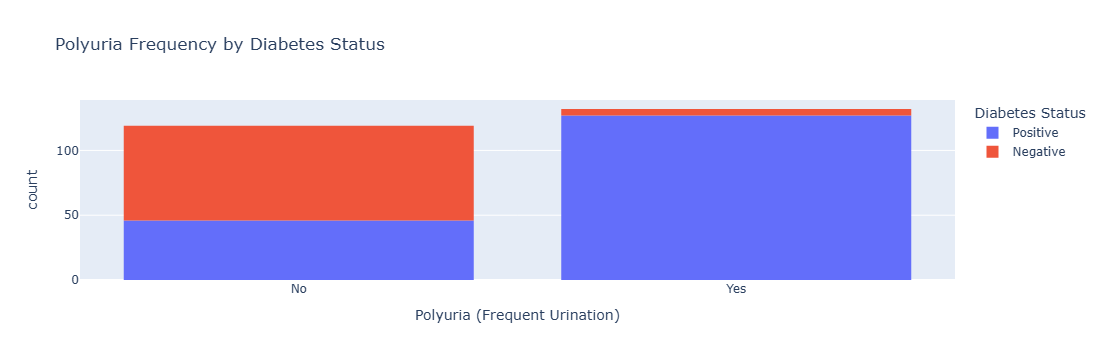

class,Negative,Positive
Polyuria,,
No,93.590000,26.590000
Yes,6.410000,73.410000


In [359]:
polyuria=px.histogram(Diabetes, x = 'Polyuria', color = 'class', title="Polyuria Frequency by Diabetes Status",
                       labels={"Polyuria": "Polyuria (Frequent Urination)", "count": "Number of Cases", "class": "Diabetes Status"})
polyuria.show()

plttbl_polyuria= ['Polyuria', 'class']
cm = sns.light_palette("green", as_cmap=True)

(round(pd.crosstab(Diabetes[plttbl_polyuria[0]], Diabetes[plttbl_polyuria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)




If a patient has polyuria (frequent urination), there's a 76% chance they could have diabetes. If they don't have polyuria, there's a 92% chance they won't get diabetes.

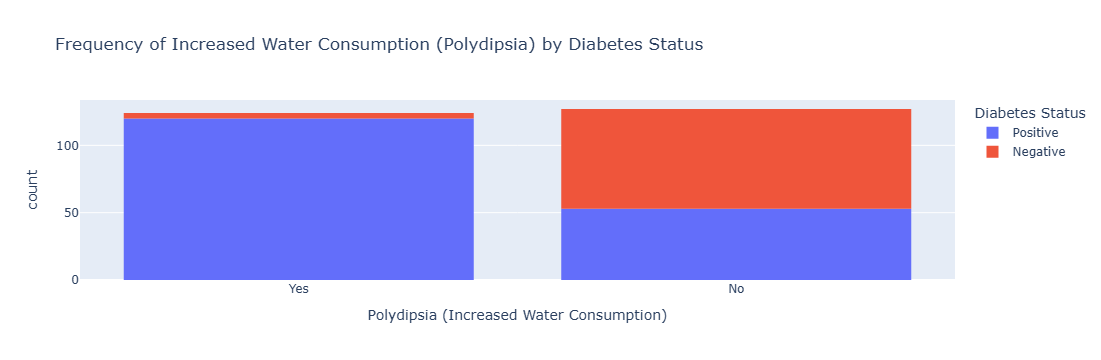

class,Negative,Positive
Polydipsia,,
No,94.870000,30.640000
Yes,5.130000,69.360000


In [361]:
polydispia = px.histogram(Diabetes, x = 'Polydipsia', color = 'class', title="Frequency of Increased Water Consumption (Polydipsia) by Diabetes Status",
    labels={"Polydipsia": "Polydipsia (Increased Water Consumption)", "count": "Number of Cases", "class": "Diabetes Status"})
polydispia.show()

plttblpolydispia= ['Polydipsia', 'class']
rm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblpolydispia[0]], Diabetes[plttblpolydispia[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = rm)

If a person has polydipsia (excessive thirst), there's a 70% chance they will develop diabetes. If they don’t have polydipsia, there's a 96% chance they won’t get diabetes.

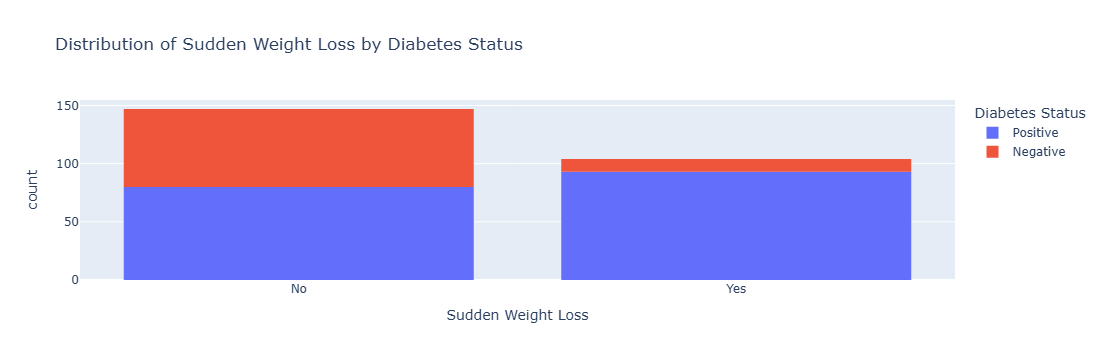

class,Negative,Positive
sudden weight loss,,
No,85.900000,46.240000
Yes,14.100000,53.760000


In [363]:
swl = px.histogram(Diabetes, x = 'sudden weight loss', color = 'class', title="Distribution of Sudden Weight Loss by Diabetes Status",
    labels={"sudden weight loss": "Sudden Weight Loss", "count": "Number of Cases", "class": "Diabetes Status"})
swl.show()

plttblswl= ['sudden weight loss', 'class']
qm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblswl[0]], Diabetes[plttblswl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = qm)

Unexpected weight loss is linked to a 58% chance of having diabetes. However, other common illnesses can also cause weight loss, so it's not always a definitive sign of diabetes.
Unexpected weight loss is an important indicator, but it is less significant than Polyuria (frequent urination) or Polydipsia (excessive thirst) when predicting diabetes.

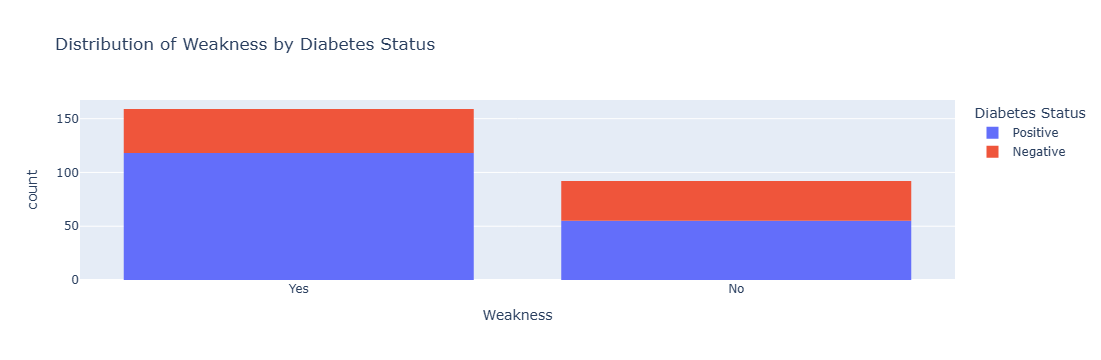

class,Negative,Positive
weakness,,
No,47.440000,31.790000
Yes,52.560000,68.210000


In [365]:
swl = px.histogram(Diabetes, x = 'weakness', color = 'class', title="Distribution of Weakness by Diabetes Status",
    labels={"weakness": "Weakness", "count": "Number of Cases", "class": "Diabetes Status"})
swl.show()
wkns = ['weakness', 'class']
sm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[wkns [0]],Diabetes[wkns [1]], normalize='columns') * 100,2)).style.background_gradient(cmap = sm)

   Individuals with weakness have a 68% chance of testing positive for diabetes.


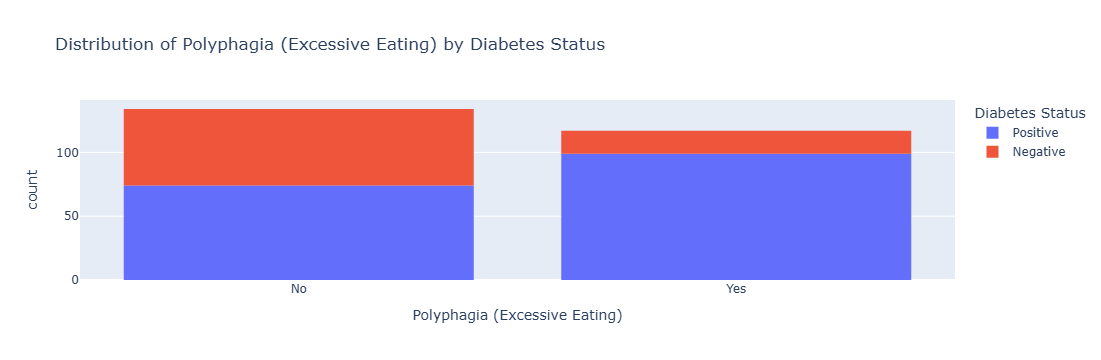

class,Negative,Positive
Polyphagia,,
No,76.920000,42.770000
Yes,23.080000,57.230000


In [367]:
eating = px.histogram(Diabetes, x = 'Polyphagia', color = 'class', title="Distribution of Polyphagia (Excessive Eating) by Diabetes Status",

    labels={"Polyphagia": "Polyphagia (Excessive Eating)", "count": "Number of Cases", "class": "Diabetes Status"})
eating.show()

plt_eating= ['Polyphagia', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_eating[0]], Diabetes[plt_eating[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with an obsessive eating disorder have a 59% chance of developing diabetes, but a 76% chance of not developing it, indicating a lower risk for diabetes.

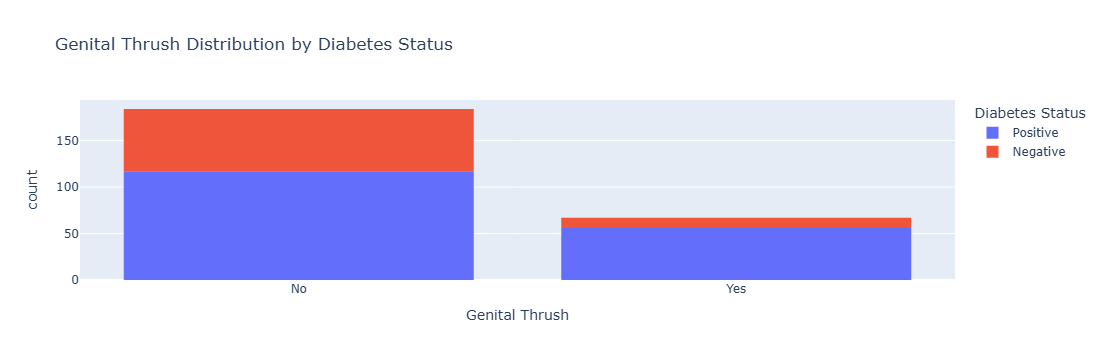

class,Negative,Positive
Genital thrush,,
No,85.900000,67.630000
Yes,14.100000,32.370000


In [369]:
gntlthrsh = px.histogram(Diabetes, x = 'Genital thrush',color='class',title="Genital Thrush Distribution by Diabetes Status",

    labels={"Genital thrush": "Genital Thrush", "count": "Number of Cases", "class": "Diabetes Status"})
gntlthrsh.show()

plt_thrsh= ['Genital thrush', 'class']
um = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_thrsh[0]], Diabetes[plt_thrsh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = um)

Individuals with genital thrush have a 25.94% chance of testing positive for diabetes, while those without genital thrush have a 74.06% chance of testing positive.

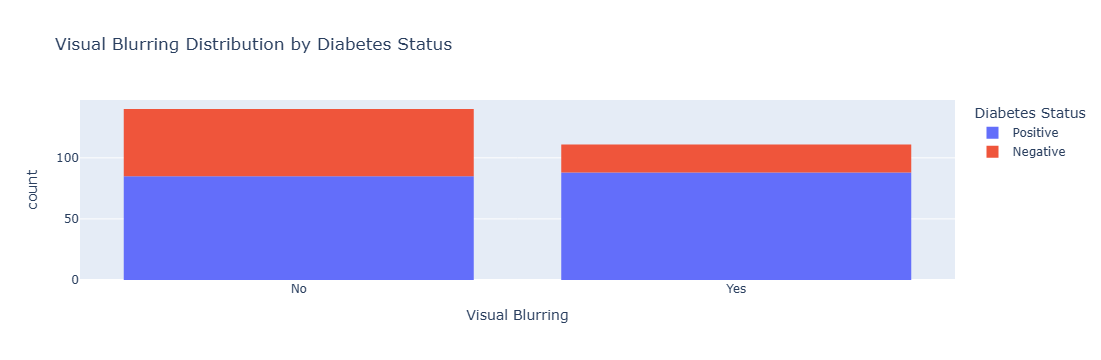

class,Negative,Positive
visual blurring,,
No,70.510000,49.130000
Yes,29.490000,50.870000


In [371]:
visual = px.histogram(Diabetes, x = 'visual blurring', color = 'class',  title="Visual Blurring Distribution by Diabetes Status",

    labels={"visual blurring": "Visual Blurring", "count": "Number of Cases", "class": "Diabetes Status"})
visual.show()

plt_blurring= ['visual blurring', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_blurring[0]], Diabetes[plt_blurring[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)


Individuals with visual blurring have a 54.69% chance of testing positive for diabetes, while those without visual blurring have a 45.31% chance of testing positive.

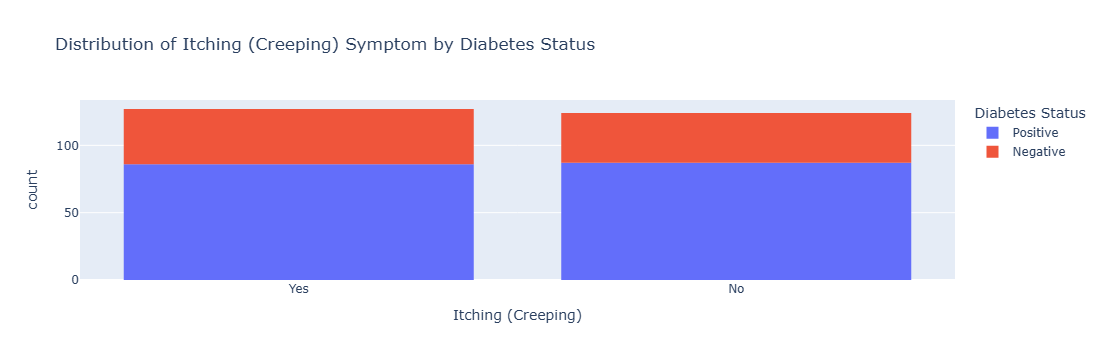

class,Negative,Positive
Itching,,
No,47.440000,50.290000
Yes,52.560000,49.710000


In [373]:
creeping = px.histogram(Diabetes, x = 'Itching', color = 'class', title="Distribution of Itching (Creeping) Symptom by Diabetes Status",

    labels={"Itching": "Itching (Creeping)", "count": "Number of Cases", "class": "Diabetes Status"})
creeping.show()

plt_creeping= ['Itching', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_creeping[0]], Diabetes[plt_creeping[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with itching have a 48.12% chance of testing positive for diabetes, while those without itching have a 51.88% chance of testing positive. This shows that itching has a minimal impact on the likelihood of testing positive for diabetes.

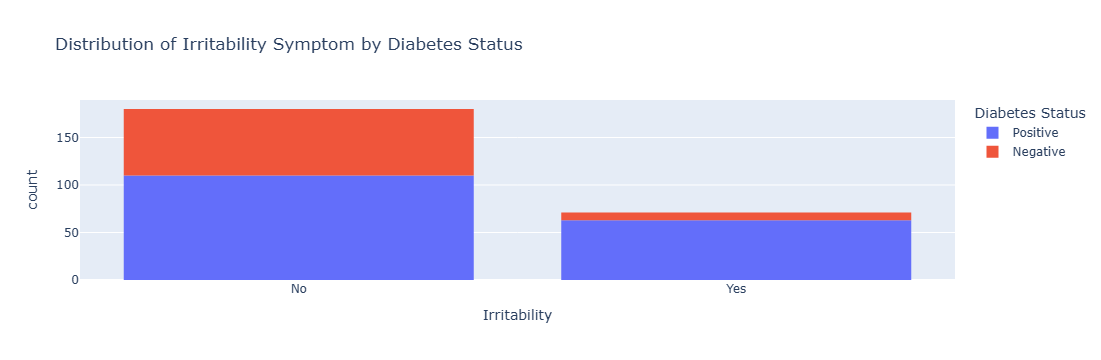

class,Negative,Positive
Irritability,,
No,89.740000,63.580000
Yes,10.260000,36.420000


In [375]:
irritiability = px.histogram(Diabetes, x = 'Irritability', color = 'class', title="Distribution of Irritability Symptom by Diabetes Status",

    labels={"Irritability": "Irritability", "count": "Number of Cases", "class": "Diabetes Status"})
irritiability.show()

plt_irritiability= ['Irritability', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_irritiability[0]], Diabetes[plt_irritiability[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with irritability have a 34.38% chance of testing positive for diabetes, while those without irritability have a 65.62% chance of testing positive. This suggests that irritability is associated with a lower likelihood of testing positive for diabetes.

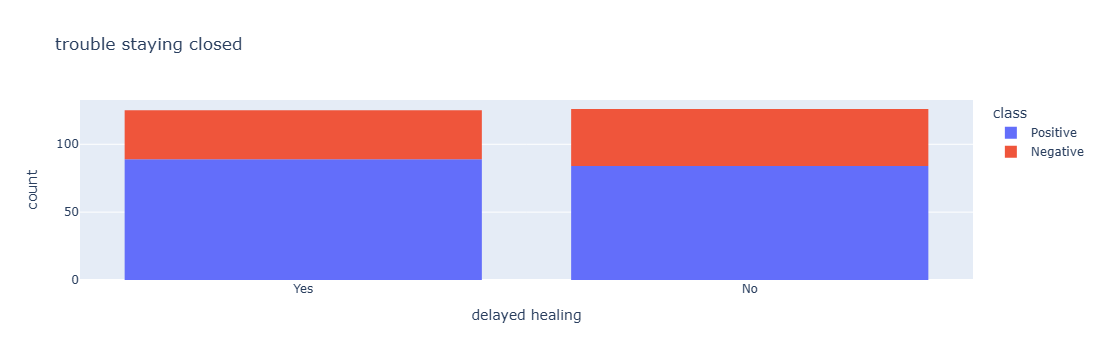

class,Negative,Positive
delayed healing,,
No,53.850000,48.550000
Yes,46.150000,51.450000


In [377]:
dh = px.histogram(Diabetes, x = 'delayed healing', color = 'class', title="trouble staying closed")
dh.show()

plt_dh= ['delayed healing', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_dh[0]], Diabetes[plt_dh[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with delayed healing have a 47.81% chance of testing positive for diabetes, while those without delayed healing have a 52.19% chance of testing positive. This indicates that delayed healing has a minimal impact on the likelihood of testing positive for diabetes.

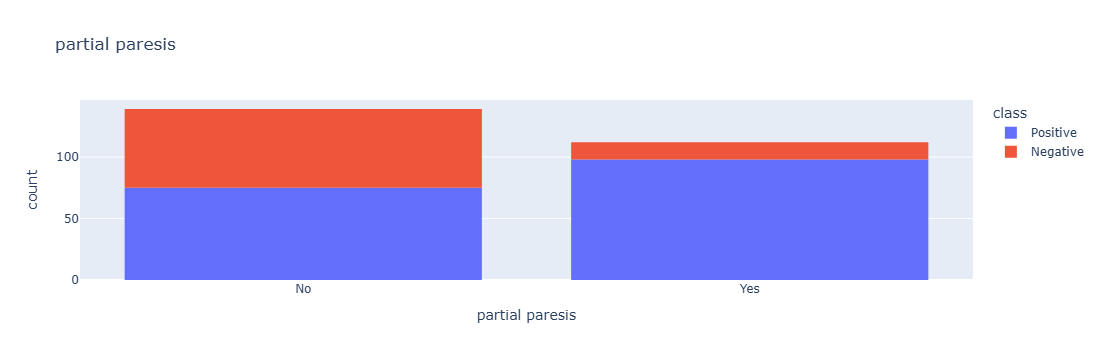

class,Negative,Positive
partial paresis,,
No,82.050000,43.350000
Yes,17.950000,56.650000


In [379]:
paresis = px.histogram(Diabetes, x = 'partial paresis', color = 'class', title="partial paresis")
paresis.show()

plt_paresis= ['partial paresis', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_paresis[0]], Diabetes[plt_paresis[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with partial paresis have a 60% chance of testing positive for diabetes, while those without partial paresis have a 40% chance of testing positive.

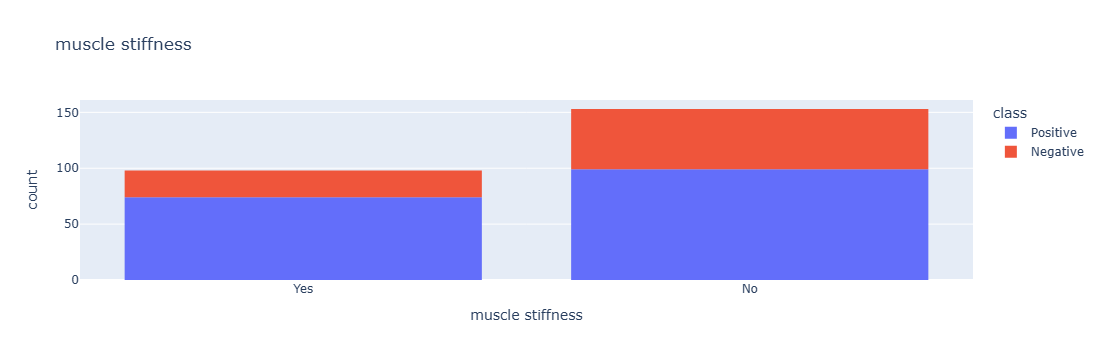

class,Negative,Positive
muscle stiffness,,
No,69.230000,57.230000
Yes,30.770000,42.770000


In [381]:
muscle_stiffness = px.histogram(Diabetes, x = 'muscle stiffness', color = 'class', title="muscle stiffness")
muscle_stiffness.show()

plt_stiffness= ['muscle stiffness', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_stiffness[0]], Diabetes[plt_stiffness[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with muscle stiffness have a 42.19% chance of testing positive for diabetes, while those without muscle stiffness have a 57.81% chance of testing positive. This indicates that muscle stiffness is associated with a slightly lower likelihood of testing positive for diabetes.

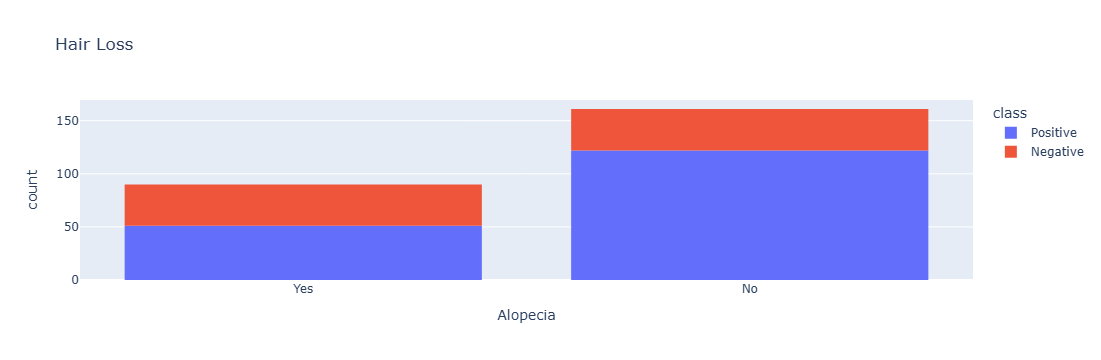

class,Negative,Positive
Alopecia,,
No,50.000000,70.520000
Yes,50.000000,29.480000


In [383]:
Hair_loss = px.histogram(Diabetes, x = 'Alopecia', color = 'class', title="Hair Loss")
Hair_loss.show()

plt_Hair_loss= ['Alopecia', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_Hair_loss[0]], Diabetes[plt_Hair_loss[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with alopecia have a 24.38% chance of testing positive for diabetes, while those without alopecia have a 75.62% chance of testing positive. This suggests that alopecia is associated with a lower likelihood of testing positive for diabetes

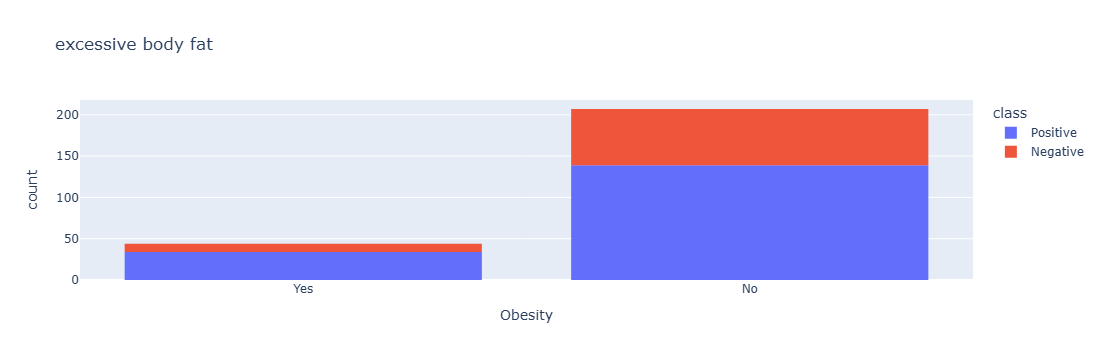

class,Negative,Positive
Obesity,,
No,87.180000,80.350000
Yes,12.820000,19.650000


In [385]:
Obesity = px.histogram(Diabetes, x = 'Obesity', color = 'class', title="excessive body fat")
Obesity.show()

plt_body_fat= ['Obesity', 'class']
tm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_body_fat[0]], Diabetes[plt_body_fat[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

Individuals with obesity have a 19.06% chance of testing positive for diabetes, while those without obesity have an 80.94% chance of testing positive. This suggests that obesity is associated with a reduced likelihood of testing positive for diabetes in this dataset.

# Label Encoding

In [388]:
from sklearn import preprocessing
from sklearn import model_selection
number = preprocessing.LabelEncoder()
dtacpy1 = Diabetes.copy()   # Duplicating the Dataset
dtacpy1.head(5)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [389]:
for i in dtacpy1:
    dtacpy1[i] = number.fit_transform(dtacpy1[i])
dtacpy1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [390]:

X = dtacpy1.drop(['class'],axis=1) # Independent
y= dtacpy1['class'] # Dependent
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [391]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

Feature Correlations with Target Variable:
 Age                   0.049359
Gender               -0.309413
Polyuria              0.620992
Polydipsia            0.594615
sudden weight loss    0.372554
weakness              0.150254
Polyphagia            0.316808
Genital thrush        0.191117
visual blurring       0.199228
Itching              -0.026411
Irritability          0.268806
delayed healing       0.048976
partial paresis       0.360288
muscle stiffness      0.113890
Alopecia             -0.198024
Obesity               0.083167
dtype: float64


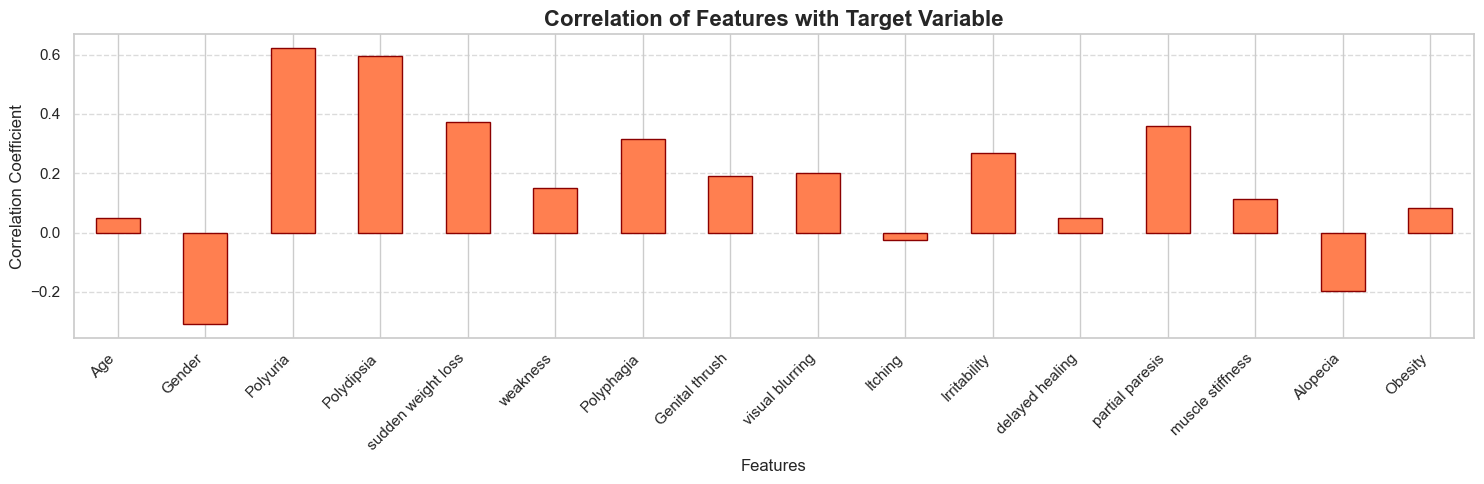

In [392]:


# Calculate the correlation of each feature with the target variable
correlation = X.corrwith(y)

# Print the correlation values for reference
print("Feature Correlations with Target Variable:\n", correlation)

# Enhanced Bar Plot for Correlation with custom color
plt.figure(figsize=(15, 5))
correlation.plot(
    kind="bar",
    color="coral",  # Change bar color to coral
    edgecolor="darkred",
    linewidth=1,
    title="Feature Correlation with Target Variable (Class)"
)

# Add grid and adjust plot aesthetics
plt.title("Correlation of Features with Target Variable", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation Coefficient", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()


* From the graph above, we can identify a strong correlation between the variable "Class" (indicating diabetes presence) and specific factors, listed in order of strongest positive relationship:
  
  * Polyuria (frequent urination)
  * Polydipsia (increased thirst)
  * Sudden weight loss
  *  Partial paresis (muscle weakness) 

* These factors are positively correlated with the likelihood of diabetes, meaning patients showing these symptoms are more likely to be diagnosed as diabetic. This insight is key for identifying individuals at higher risk based on common symptoms.

* On the other hand, variables that show a negative correlation—such as Alopecia (hair loss)—appear much less significant. A negative correlation with "Class" suggests that if a patient tests positive for alopecia alone, they are unlikely to be diabetic. Thus, alopecia is not a meaningful indicator of diabetes risk in isolation.

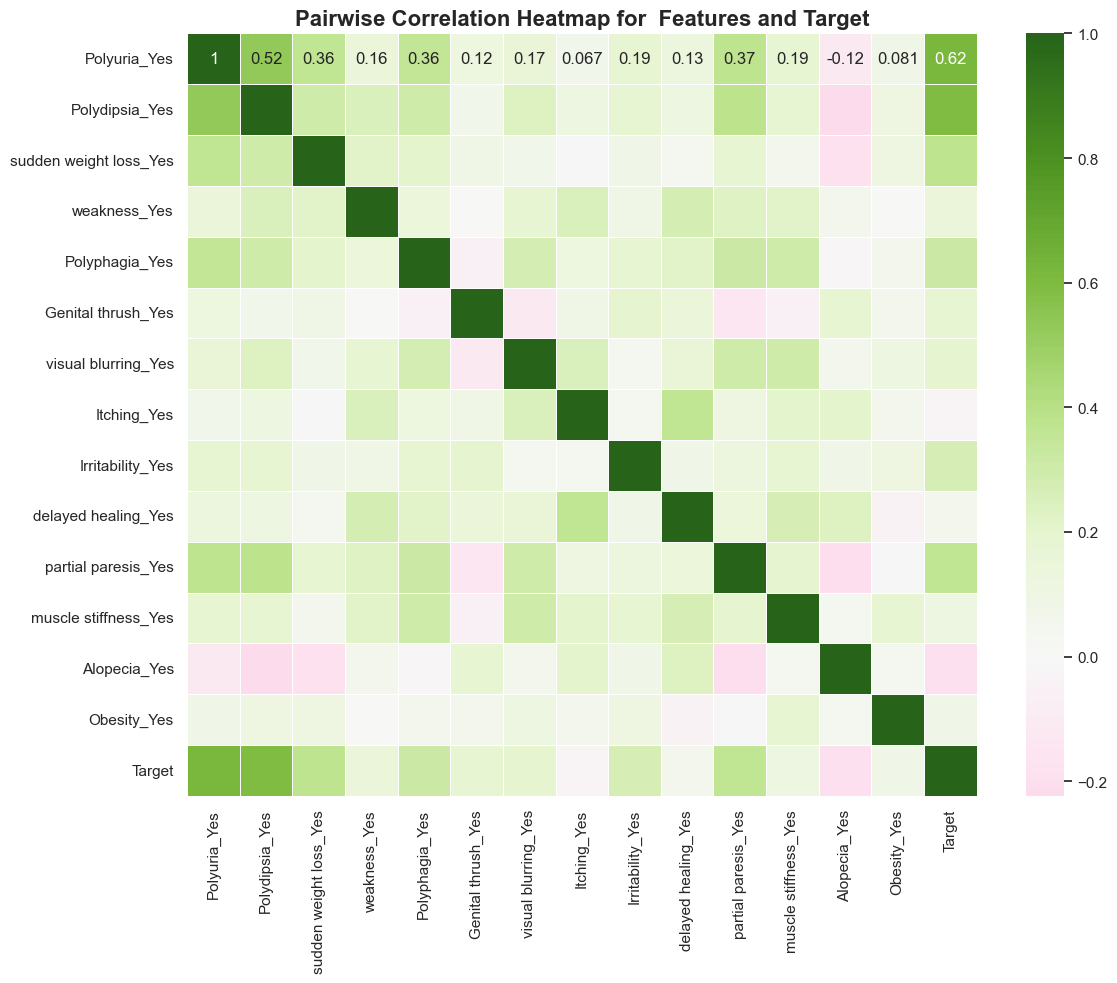

In [394]:

symptoms = ["Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia",
            "Genital thrush", "visual blurring", "Itching", "Irritability",
            "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"]

df_binary = pd.get_dummies(Diabetes[symptoms], drop_first=True)
df_binary['Target'] = Diabetes['class'].apply(lambda x: 1 if x == "Positive" else 0)

# Calculate pairwise correlations
corr_matrix_binary = df_binary.corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_binary, cmap="PiYG", annot=True, linewidths=0.5, center=0)

plt.title("Pairwise Correlation Heatmap for  Features and Target", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


The pairwise correlation heatmap for binary features provides the following insights about the relationships between symptoms and diabetes:

* **Direct Symptom-Diabetes Correlation :**
    * The correlation values in the "Target" row show how strongly each symptom is associated with a diabetes diagnosis (positive correlation) or with        the absence of diabetes (negative correlation).
    * Positive Correlations (values closer to +1): Symptoms with higher positive correlations are more commonly present in individuals diagnosed with diabetes. For instance, if symptoms like Polyuria or Polydipsia have high positive correlations, this indicates these symptoms are strong indicators of diabetes.
    * Negative Correlations (values closer to -1): Symptoms with negative correlations may be more frequent in individuals without diabetes. For instance, if Alopecia shows a negative correlation, it could indicate that individuals with alopecia are less likely to be diagnosed with diabetes.

* **Inter-Symptom Relationships :**
                        Symptoms with high correlations to each other may indicate a tendency to co-occur. For example, if Polyuria and Polydipsia show a strong correlation with each other, it suggests these symptoms often appear together in diabetic patients, possibly due to similar physiological effects.Weak or Neutral

* **Correlations :**
      Features with correlation values near zero with the target variable may not contribute much to diabetes prediction and could be less useful in diagnostic contexts. These features might represent common symptoms that don’t have a strong association with diabetes specifically, such as symptoms more related to other health issues.

* **Potential Predictive Indicators :**
     The symptoms with the strongest positive or negative correlations with the target variable are the most useful for diagnosis and model prediction. Positive indicators (e.g., symptoms highly correlated with diabetes) could become focus points for early screening.

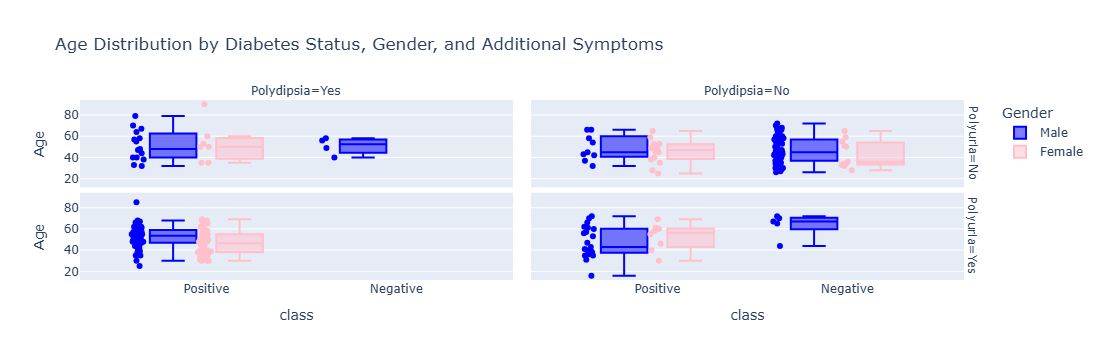

In [396]:
# Enhanced box plot with all dataset features in tooltips
genbox = px.box(
    Diabetes,
    y="Age",
    x="class",
    color="Gender",
    points="all",
    title="Age Distribution by Diabetes Status, Gender, and Additional Symptoms",

    # Custom color mapping for gender
    color_discrete_map={"Male": "blue", "Female": "pink"},

    # Adding facets for additional segmentation (e.g., by "sudden weight loss")
    facet_row="Polyuria",  # Faceting by Polyuria (could change based on interest)
    facet_col="Polydipsia",  # Faceting by Polydipsia

    # Including all relevant attributes as hover data for insight
    hover_data={
        "Polyuria": True,
        "Polydipsia": True,
        "sudden weight loss": True,
        "weakness": True,
        "Polyphagia": True,
        "Genital thrush": True,
        "visual blurring": True,
        "Itching": True,
        "Irritability": True,
        "partial paresis": True,
        "Alopecia": True,
        "class": True
    }
)

# Show the enhanced plot
genbox.show()


* The box plot shows that age and gender influence diabetes status, with younger females and older males showing distinct patterns.
*  Symptoms like frequent urination (Polyuria) and excessive thirst (Polydipsia) are commonly seen in diabetes-positive cases, while symptoms like hair loss (Alopecia) are less common among them.
*   This plot helps us ientify typical diabetes symptoms and points to specific combinations of age, gender, and symptoms that may assist in early detection of diabetes.

## Feature Selection

 * Feature selection is the process of identifying and selecting the most important features in a dataset. It aims to improve model performance by removing irrelevant or redundant features. This helps reduce overfitting, improve accuracy, and decrease computational cost.

Feature Importance (Ordered by Random Forest Importance):


               Feature  Chi2 Score  RF Importance
2             Polyuria   45.890026       0.218773
3           Polydipsia   44.903006       0.185810
0                  Age    3.590430       0.101612
1               Gender    8.712006       0.068069
4   sudden weight loss   20.403086       0.054314
12     partial paresis   18.043260       0.046713
10        Irritability   13.006198       0.045753
8      visual blurring    5.556841       0.041676
6           Polyphagia   13.449259       0.037551
14            Alopecia    6.313391       0.035572
11     delayed healing    0.302236       0.031879
7       Genital thrush    6.720759       0.031129
9              Itching    0.086492       0.029312
5             weakness    2.077010       0.025376
13    muscle stiffness    1.984555       0.025035
15             Obesity    1.431754       0.021426


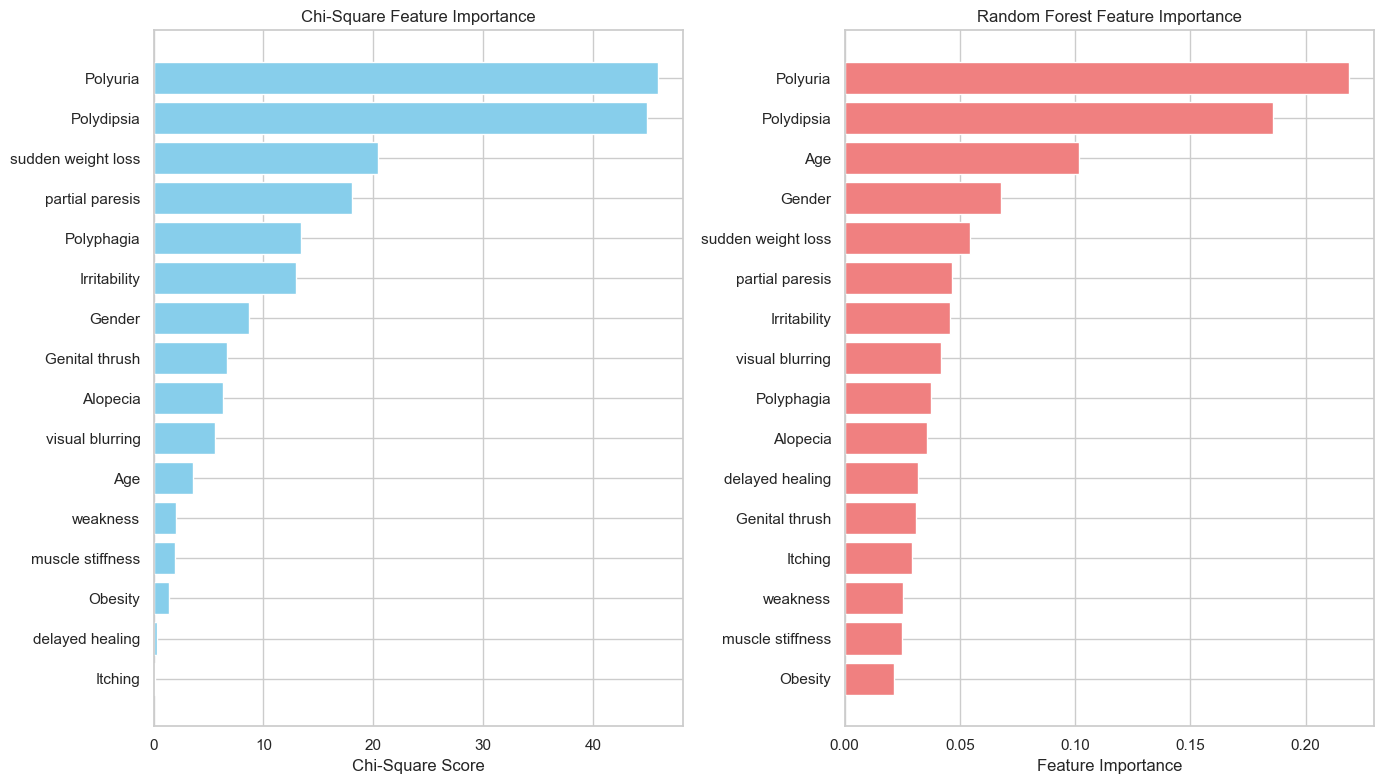

In [399]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

# Perform Chi-Square feature selection
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_

# Perform Random Forest-based feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
rf_importances = rf_model.feature_importances_

# Combine feature importance metrics
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'RF Importance': rf_importances
})

# Sort features by Random Forest Importance (descending)
feature_importance_sorted = feature_importance.sort_values(by='RF Importance', ascending=False)

# Display sorted feature importance
print("Feature Importance (Ordered by Random Forest Importance):")
print("\n")
print(feature_importance_sorted)


import matplotlib.pyplot as plt

# Sort features and scores by Chi-Square scores (descending)
chi2_sorted = feature_importance.sort_values(by='Chi2 Score', ascending=False)
chi2_features = chi2_sorted['Feature']
chi2_scores_sorted = chi2_sorted['Chi2 Score']

# Sort features and scores by Random Forest importance (descending)
rf_sorted = feature_importance.sort_values(by='RF Importance', ascending=False)
rf_features = rf_sorted['Feature']
rf_importances_sorted = rf_sorted['RF Importance']

# Plot Chi-Square Scores and Random Forest Importances
plt.figure(figsize=(14, 8))

# Chi-Square Scores plot
plt.subplot(1, 2, 1)
plt.barh(chi2_features, chi2_scores_sorted, color='skyblue')
plt.title('Chi-Square Feature Importance')
plt.xlabel('Chi-Square Score')
plt.gca().invert_yaxis()  # Ensures highest priority is at the top

# Random Forest Importances plot
plt.subplot(1, 2, 2)
plt.barh(rf_features, rf_importances_sorted, color='lightcoral')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Ensures highest priority is at the top

plt.tight_layout()
plt.show()


* **Chi-Square (Chi2)**: Looks at each feature (like Gender or Age) by itself to see if it has a strong, direct link to the outcome (like diabetes). If a feature doesn’t stand out alone, it gets a low score.

* **Random Forest (RF)**: Looks at how features work together. Even if Gender or Age don’t seem very important alone, they might play a big role when combined with other features (like sudden weight loss or Polyuria) to make better predictions.

So, Chi2 checks individual importance, while RF focuses on teamwork among the features.

**Why Random Forest?**
* If your goal is statistical analysis and you need a quick, simple check, Chi2 might suffice. But if you’re building a predictive model, Random Forest provides richer insights into how features influence outcomes, especially when features interact or relationships are complex.

* By combining both methods, you strike a balance between efficiency (Chi2) and effectiveness (RF). This approach avoids unnecessary complexity while ensuring you keep features that significantly impact the model.

## PCA Analysis and Feature Reduction for Diabetes Prediction Model

* Dimensionality reduction refers to the process of reducing the number of input variables (features) in a dataset while retaining as much of the original information as possible. 

Variance before PCA (for each feature):
Age                   156.901578
Gender                  0.232032
Polyuria                0.250327
Polydipsia              0.250964
sudden weight loss      0.243633
weakness                0.233116
Polyphagia              0.249849
Genital thrush          0.196462
visual blurring         0.247649
Itching                 0.250964
Irritability            0.203665
delayed healing         0.250996
partial paresis         0.248096
muscle stiffness        0.238948
Alopecia                0.230916
Obesity                 0.145147
dtype: float64
-------------------------------------------------------------------
Explained variance by each component: [0.21038589 0.13269542 0.09048875 0.07433586 0.06144148 0.05270025
 0.05208499 0.04818633 0.04649482 0.04044059 0.03836388 0.03606481
 0.03372883 0.02940651 0.0284108 ]
Total components selected: 15
Original shape: (251, 16), Reduced shape: (251, 15)


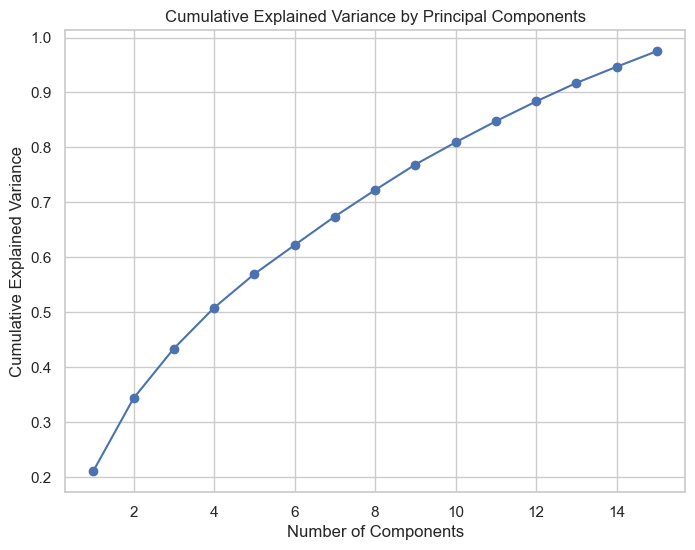

In [403]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoder = LabelEncoder()
for col in Diabetes.columns:
    if Diabetes[col].dtype == 'object':
        Diabetes[col] = encoder.fit_transform(Diabetes[col])

# Separate features and target
X = Diabetes.drop(columns=['class'])
y = Diabetes['class']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

variance_before_pca = X.var(axis=0)  # Variance of each feature in the original data
print(f"Variance before PCA (for each feature):\n{variance_before_pca}")

print("-------------------------------------------------------------------")

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Display explained variance
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")
print(f"Total components selected: {pca.n_components_}")
print(f"Original shape: {X.shape}, Reduced shape: {X_pca.shape}")

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



# Identify the removed features based on the number of components retained
original_columns = X.columns  # If X is a pandas DataFrame
retained_features_count = pca.n_components_

### Why PCA is Unnecessary for this Datasets?
* PCA is not needed , as the dataset has only 16 features, and applying it may lose important original feature information.

## Model Building

### evaluated six models:

* Logistic Regression
* Random Forest
* Gradient Boosting
* Support Vector Classifier (SVC)
* Extra trees
* Decision Tree

  
### Each model was checked on FIve metrics: Accuracy, Precision,  Recall , and F1 Score,AUC-ROC.

* Accuracy: How often the model is correct.
* Precision: How many predicted positives are actually correct.
* Recall: How many actual positives the model correctly identified.
* F1 Score: F1 score balances precision and recall for accurate positive predictions.
* AUC-ROC (Area Under the Receiver Operating Characteristic Curve) measures the ability of a model to distinguish between classes, with a value of 1 indicating perfect discrimination and 0.5 suggesting no better than random guessing.

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scaling the data
* Scaling ensures that all features are on the same scale, preventing any feature from dominating the model due to its larger range. It improves model convergence, performance, and ensures fair contributions from each feature.
  
**Why Scaling Age ?**

> 
Age is a numerical feature that can have a wide range (e.g., from 0 to 100+).

In [409]:
# Initialize the scaler
scaler = MinMaxScaler()
# Scale the 'age' feature to the range [0, 1]
Diabetes['Age'] = scaler.fit_transform(Diabetes[['Age']])
# Check the first few scaled values
Diabetes.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,0.527027,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,0.554054,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,0.675676,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,0.689189,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,0.729730,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


### Logistic Regression

In [411]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate evaluation metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_log_reg))
print()


Logistic Regression:
Accuracy: 0.8235294117647058
Precision: 0.8228609625668449
Recall: 0.8235294117647058
F1 Score: 0.8130718954248366
AUC-ROC: 0.9446428571428571



###  Decision Tree Classifier

In [413]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_decision_tree = decision_tree.predict(X_test)
y_proba_decision_tree = decision_tree.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate AUC-ROC (will raise an error if predict_proba is not supported)
auc_roc_decision_tree = roc_auc_score(y_test, y_proba_decision_tree)

# Calculate evaluation metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Precision:", precision_score(y_test, y_pred_decision_tree, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_decision_tree, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_decision_tree, average='weighted'))
print("AUC-ROC:", auc_roc_decision_tree)
print()


Decision Tree Classifier:
Accuracy: 0.8823529411764706
Precision: 0.8809902339314104
Recall: 0.8823529411764706
F1 Score: 0.8800653594771242
AUC-ROC: 0.8464285714285714



### Support Vector Classifier (SVC)

In [415]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the Support Vector Classifier with probability=True
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)
y_proba_svc = svc.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate evaluation metrics with zero_division to avoid warnings
print("Support Vector Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_svc, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred_svc, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_svc))
print()


Support Vector Classifier:
Accuracy: 0.6862745098039216
Precision: 0.47097270280661285
Recall: 0.6862745098039216
F1 Score: 0.5585955312357501
AUC-ROC: 0.8785714285714286



###  Random Forest Classifier

In [417]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate evaluation metrics
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))
print()


Random Forest Classifier:
Accuracy: 0.9215686274509803
Precision: 0.921947157241275
Recall: 0.9215686274509803
F1 Score: 0.9200435729847495
AUC-ROC: 0.9767857142857143



### Gradient Boosting Classifier

In [419]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the Gradient Boosting model
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train, y_train)

# Predict on the test set
y_pred_grad_boost = grad_boost.predict(X_test)
y_proba_grad_boost = grad_boost.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate evaluation metrics
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_grad_boost))
print("Precision:", precision_score(y_test, y_pred_grad_boost, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_grad_boost, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_grad_boost, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_grad_boost))
print()


Gradient Boosting Classifier:
Accuracy: 0.9019607843137255
Precision: 0.9036278479002937
Recall: 0.9019607843137255
F1 Score: 0.8989042948308278
AUC-ROC: 0.9517857142857142



### Extra Trees Classifier

In [421]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train, y_train)

# Predict on the test set and calculate probabilities for AUC-ROC
y_pred_extra_trees = extra_trees.predict(X_test)
y_proba_extra_trees = extra_trees.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate evaluation metrics
print("Extra Trees Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_extra_trees))
print("Precision:", precision_score(y_test, y_pred_extra_trees, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_extra_trees, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_extra_trees, average='weighted'))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_extra_trees))
print()


Extra Trees Classifier:
Accuracy: 0.9215686274509803
Precision: 0.921947157241275
Recall: 0.9215686274509803
F1 Score: 0.9200435729847495
AUC-ROC: 0.9892857142857143



### Create the Results DataFrame

In [490]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# List of models, their predictions, and predicted probabilities for AUC-ROC
models = [
    ('Logistic Regression', y_pred_log_reg, y_proba_log_reg),
    ('Decision Tree Classifier', y_pred_decision_tree, y_proba_decision_tree),
    ('Support Vector Classifier', y_pred_svc, y_proba_svc),
    ('Random Forest Classifier', y_pred_rf, y_proba_rf),
    ('Gradient Boosting Classifier', y_pred_grad_boost, y_proba_grad_boost),
    ('Extra Trees Classifier', y_pred_extra_trees, y_proba_extra_trees)
    
]

# Calculate metrics for each model and create the DataFrame
results_nt = {
    'Model': [model[0] for model in models],
    'Accuracy': [accuracy_score(y_test, model[1]) for model in models],
    'Precision': [precision_score(y_test, model[1], average='weighted', zero_division=0) for model in models],
    'Recall': [recall_score(y_test, model[1], average='weighted', zero_division=0) for model in models],
    'F1 Score': [f1_score(y_test, model[1], average='weighted', zero_division=0) for model in models],
    'AUC-ROC': [roc_auc_score(y_test, model[2]) if model[2] is not None else 'N/A' for model in models]
}

results_dfnt = pd.DataFrame(results_nt)

# Display the DataFrame
results_dfnt


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.823529,0.822861,0.823529,0.813072,0.944643
1,Decision Tree Classifier,0.882353,0.880990,0.882353,0.880065,0.846429
2,Support Vector Classifier,0.901961,0.912506,0.901961,0.903968,0.969643
3,Random Forest Classifier,0.921569,0.921947,0.921569,0.920044,0.979464
4,Gradient Boosting Classifier,0.901961,0.903628,0.901961,0.898904,0.951786
5,Extra Trees Classifier,0.921569,0.921947,0.921569,0.920044,0.989286


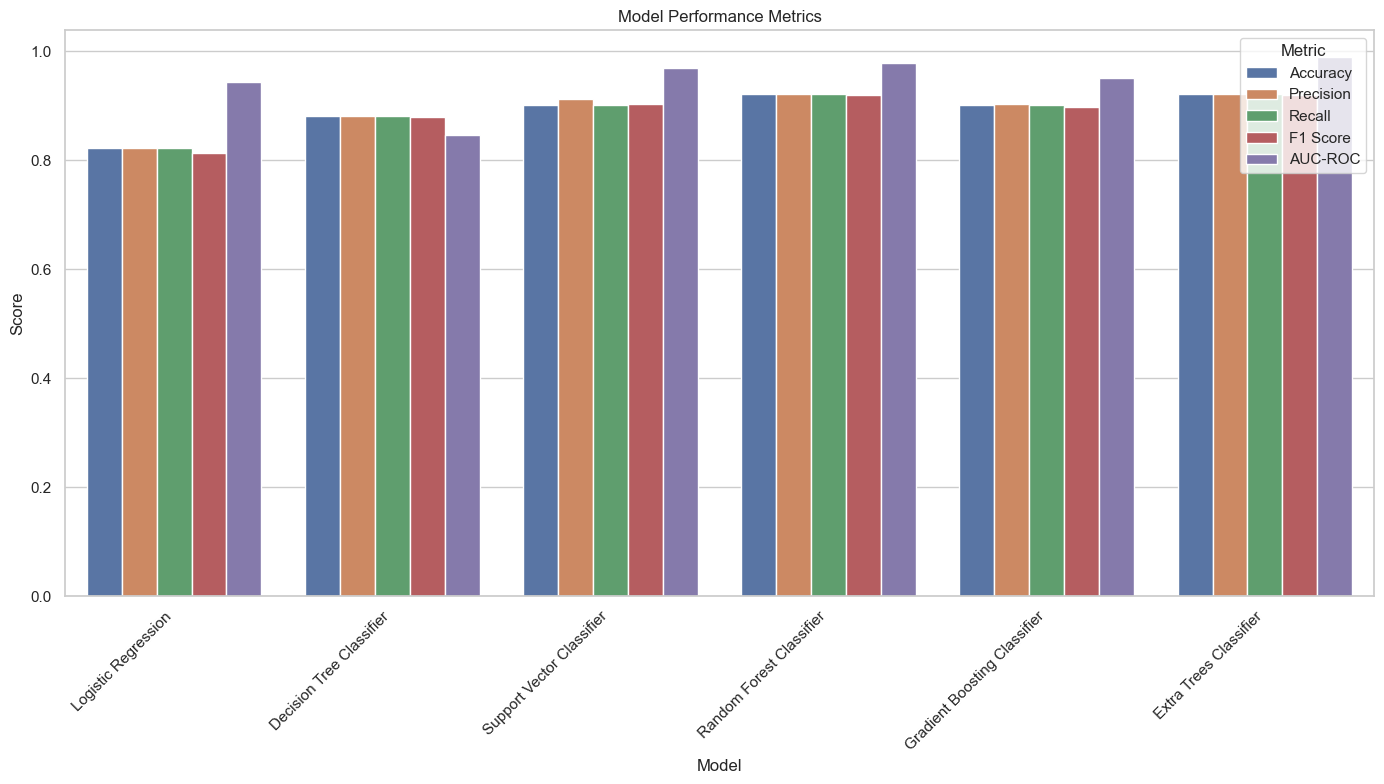

In [495]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert AUC-ROC column to numeric, handling 'N/A' as NaN for plotting
results_dfnt['AUC-ROC'] = pd.to_numeric(results_dfnt['AUC-ROC'], errors='coerce')

# Melt the DataFrame for easy plotting
results_melted = pd.melt(results_dfnt, id_vars='Model', var_name='Metric', value_name='Score')

# Set the plot style
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')

# Customize the plot
plt.title('Model Performance Metrics')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Score')
plt.tight_layout()

# Show the plot
plt.show()


### Hyperparameter Tuning
* Hyperparameter tuning refers to the process of selecting the best values for the hyperparameters of a machine learning model.
* For hyperparameter tuning in our code, we used a GridSearchCV method.
* GridSearchCV tests different settings for a model, checks which one works best using your data, and picks the winner for the most accurate predictions.

### Logistic Regression

In [427]:
results_tu=[]

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],        # Regularization type (L1 and L2)
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2
}

# Create a Logistic Regression model with a higher max_iter
log_reg = LogisticRegression(random_state=42, max_iter=5000)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_log_reg = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred = best_log_reg.predict(X_test)
y_proba = best_log_reg.predict_proba(X_test)[:, 1]  # Probability for AUC-ROC

# Evaluate performance
metrics = {
    'Model': 'Logistic Regression (Tuned)',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
}
results_tu.append(metrics)


# Print each metric on a new line
for metric, value in metrics.items():
    if isinstance(value, float):  # Format numeric values to 4 decimal places
        print(f"{metric}: {value:.4f}")
    else:  # Print non-numeric values directly
        print(f"{metric}: {value}")


Model: Logistic Regression (Tuned)
Accuracy: 0.8235
Precision: 0.8270
Recall: 0.8235
F1 Score: 0.8249
AUC-ROC: 0.9446


###  Decision Tree Classifier

In [430]:
# Decision Tree Classifier
print("Tuning: Decision Tree....")
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best model
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Check if the model has `predict_proba` and compute AUC-ROC if possible
if hasattr(best_dt, "predict_proba"):
    y_proba_dt = best_dt.predict_proba(X_test)[:, 1]  # Use the probability for the positive class
    auc_roc_dt = roc_auc_score(y_test, y_proba_dt)
else:
    auc_roc_dt = "N/A"  # Set to "N/A" if the model cannot produce probabilities

# Metrics
metrics_dt = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt, average='weighted'),
    'Recall': recall_score(y_test, y_pred_dt, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_dt, average='weighted'),
    'AUC-ROC': auc_roc_dt  # Include computed AUC-ROC or "N/A"
}
results_tu.append(metrics_dt)

# Print metrics
for metric, value in metrics_dt.items():
    if isinstance(value, (int, float)):  # Format numeric values to 4 decimal places
        print(f"{metric}: {value:.4f}")
    else:  # Print non-numeric values directly
        print(f"{metric}: {value}")


Tuning: Decision Tree....
Model: Decision Tree
Accuracy: 0.8824
Precision: 0.8810
Recall: 0.8824
F1 Score: 0.8801
AUC-ROC: 0.8464


### Support Vector Machine (SVM)

In [432]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

# Tuning: Support Vector Classifier
print("Tuning: Support Vector Classifier....")
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [3, 4, 5],
}

svc = SVC(probability=True, random_state=42)

# Set up GridSearchCV with cross-validation and refit based on 'roc_auc'
grid_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc,
                        scoring='roc_auc', cv=5, refit='roc_auc', n_jobs=-1)
grid_svc.fit(X_train, y_train)

# Evaluate the best model on the test set
best_svc = grid_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
y_proba_svc = best_svc.predict_proba(X_test)[:, 1]

# Calculate the test set metrics
metrics_svc = {
    'Model': 'Support Vector Classifier',
    'Accuracy': accuracy_score(y_test, y_pred_svc),
    'Precision': precision_score(y_test, y_pred_svc, average='weighted'),
    'Recall': recall_score(y_test, y_pred_svc, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_svc, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test, y_proba_svc)
}

# Append the metrics to results_tu
results_tu.append(metrics_svc)

# Print metrics with appropriate formatting
for metric, value in metrics_svc.items():
    if isinstance(value, float):  # Format numeric values to 4 decimal places
        print(f"{metric}: {value:.4f}")
    else:  # Print non-numeric values directly
        print(f"{metric}: {value}")


Tuning: Support Vector Classifier....
Model: Support Vector Classifier
Accuracy: 0.9020
Precision: 0.9125
Recall: 0.9020
F1 Score: 0.9040
AUC-ROC: 0.9696


###  Random Forest Classifier

In [434]:
# Random Forest Classifier
print("Tuning: Random Forest....")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Metrics
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]


metrics_rf = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_rf, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test, y_proba_rf)if y_proba_rf is not None else 'N/A'
}

results_tu.append(metrics_rf)

# Print metrics with appropriate formatting
for metric, value in metrics_rf.items():
    if isinstance(value, float):  # Format numeric values to 4 decimal places
        print(f"{metric}: {value:.4f}")
    else:  # Print non-numeric values directly
        print(f"{metric}: {value}")


Tuning: Random Forest....
Model: Random Forest
Accuracy: 0.9216
Precision: 0.9219
Recall: 0.9216
F1 Score: 0.9200
AUC-ROC: 0.9795


### Gradient Boosting Classifier

In [436]:
# Gradient Boosting Classifier
print("Tuning: Gradient Boosting....")
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

# Metrics
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]

metrics_gb = {
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb, average='weighted'),
    'Recall': recall_score(y_test, y_pred_gb, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_gb, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test, y_proba_gb)
}
results_tu.append(metrics_gb)
# Print metrics with appropriate formatting

for metric, value in metrics_gb.items():
    if isinstance(value, float):  # Format numeric values to 4 decimal places
        print(f"{metric}: {value:.4f}")
    else:  # Print non-numeric values directly
        print(f"{metric}: {value}")



Tuning: Gradient Boosting....
Model: Gradient Boosting
Accuracy: 0.8627
Precision: 0.8610
Recall: 0.8627
F1 Score: 0.8615
AUC-ROC: 0.9500


### Extra Trees Classifier

In [438]:
# Extra Trees Classifier
print("Tuning: Extra Trees Classifier....")
param_grid_et = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
et = ExtraTreesClassifier(random_state=42)
grid_et = GridSearchCV(estimator=et, param_grid=param_grid_et, cv=5, scoring='accuracy')
grid_et.fit(X_train, y_train)

# Metrics
best_et = grid_et.best_estimator_
y_pred_et = best_et.predict(X_test)
y_proba_et = best_et.predict_proba(X_test)[:, 1]

metrics_et = {
    'Model': 'Extra Trees',
    'Accuracy': accuracy_score(y_test, y_pred_et),
    'Precision': precision_score(y_test, y_pred_et, average='weighted'),
    'Recall': recall_score(y_test, y_pred_et, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_et, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test, y_proba_et)
}
results_tu.append(metrics_et)

# Print metrics with appropriate formatting
for metric, value in metrics_et.items():
    if isinstance(value, float):  # Format numeric values to 4 decimal places
        print(f"{metric}: {value:.4f}")
    else:  # Print non-numeric values directly
        print(f"{metric}: {value}")


Tuning: Extra Trees Classifier....
Model: Extra Trees
Accuracy: 0.9216
Precision: 0.9219
Recall: 0.9216
F1 Score: 0.9200
AUC-ROC: 0.9839


### Create the Results DataFrame

In [440]:
# Create a DataFrame from results
results_df = pd.DataFrame(results_tu)

# Display the DataFrame
print("\nModel Performance Metrics:")
results_df



Model Performance Metrics:


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression (Tuned),0.823529,0.826990,0.823529,0.824924,0.944643
1,Decision Tree,0.882353,0.880990,0.882353,0.880065,0.846429
2,Support Vector Classifier,0.901961,0.912506,0.901961,0.903968,0.969643
3,Random Forest,0.921569,0.921947,0.921569,0.920044,0.979464
4,Gradient Boosting,0.862745,0.861002,0.862745,0.861498,0.950000
5,Extra Trees,0.921569,0.921947,0.921569,0.920044,0.983929


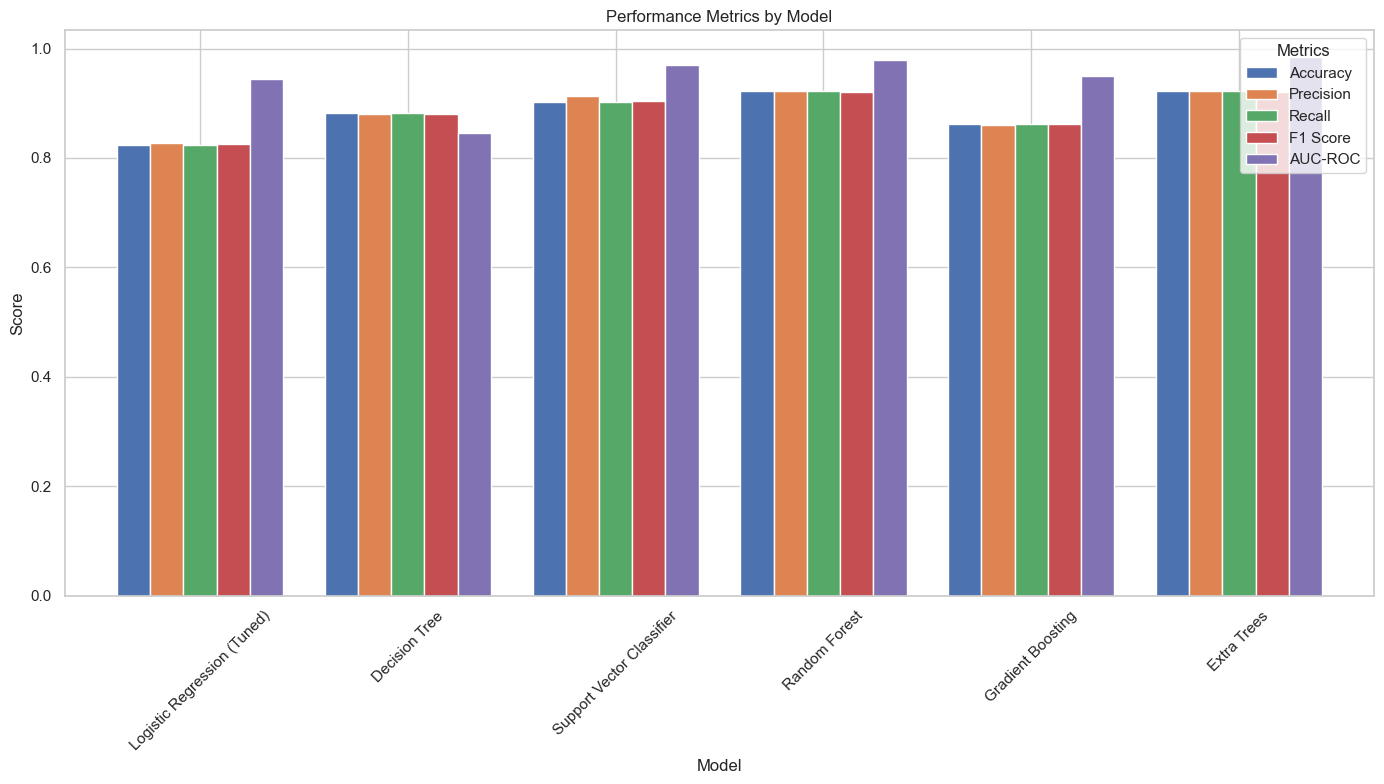

In [441]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the plot
plt.figure(figsize=(14, 8))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']].plot(kind='bar', width=0.8, ax=plt.gca())

# Customize the plot
plt.title('Performance Metrics by Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()


 The **best model** for diabetes prediction, based on analysis, is **Extra Trees** . 

### WHY?
**Best Metric for Model Selection :**

**AUC-ROC (Area Under the Receiver Operating Characteristic Curve)** is the chosen metric because it evaluates the model's ability to distinguish between positive and negative classes across all classification thresholds. It provides a comprehensive view of model performance, especially in cases where there is an imbalance between the classes or when both false positives and false negatives need to be minimized.

**Why Choose AUC-ROC Over F1 Score?**

* While F1 Score is useful when you need to balance precision and recall at a fixed threshold, AUC-ROC is preferred when you want to evaluate a model's performance across all thresholds, making it a more robust metric for understanding model discrimination and overall capability.
* Different Thresholds that support auc-roc:
   * AUC-ROC = 1: Perfect model with no errors.
   * AUC-ROC = 0.5: The model performs no better than random guessing.
   * AUC-ROC > 0.9: Excellent model with high predictive capability.
   * AUC-ROC between 0.7 and 0.9: Good performance, but may need further tuning.
 
**Best Model Choice:**

**Extra Trees Classifier:**

Why?
* It has the highest AUC-ROC (0.9839), indicating the best model performance in distinguishing between the positive and negative classes.
* It also has a very high accuracy (0.9216) and F1 Score (0.9200), suggesting good balance between precision and recall.
* The precision (0.9219) and recall (0.9216) are well balanced, which is beneficial for healthcare predictions to minimize both false positives and false negatives.
  
**Why Not Other Models?**
* Random Forest has a slightly lower AUC-ROC (0.9795) and similar performance metrics compared to Extra Trees but is slightly outperformed by Extra Trees in AUC-ROC.
* Support Vector Classifier (SVC) has high metrics but a slightly lower AUC-ROC (0.9696) compared to Extra Trees.
* Logistic Regression has a good AUC-ROC (0.9446) but lower performance across other metrics compared to the Extra Trees Classifier and Random Forest.
* Gradient Boosting and Decision Tree have lower AUC-ROCs and overall metrics than Extra Trees and Random Forest.
     
**Conclusion :**

* The Extra Trees model is the best for diabetes prediction due to its highest AUC-ROC score, indicating superior overall performance in distinguishing between diabetic and non-diabetic cases. While the F1 Score balances precision and recall, AUC-ROC provides a comprehensive view of model capability across all thresholds, making it ideal for minimizing both false positives and false negatives.
* AUC-ROC is preferred over F1 Score because it evaluates the model's ability to distinguish between classes across all thresholds, providing a more comprehensive view of performance.

